# Import Packages

## Basic Packages

In [1]:
import os

## Data Operations 

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta

## Machine Learning 

In [3]:
# from fbprophet import Prophet
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

## Data Visualization

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV File

In [25]:
# cwd = os.path.dirname(os.path.realpath(__file__))
# FilePath = cwd + '\\Create_Accounts_Num.csv'
FilePath = 'Create_Accounts_Num.csv'
Account_Origin = pd.read_csv(FilePath)

## Delete complicate rows

In [27]:
Account_Origin = Account_Origin.drop_duplicates(keep='last')

## Transform date column

In [29]:
Account_Origin.loc[:,'Date'] = Account_Origin['DateTime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
Account_Origin.loc[:,'Year'] = Account_Origin['Date'].apply(lambda x: x.year)
Account_Origin.loc[:,'Month'] = Account_Origin['Date'].apply(lambda x: x.month)
Account_Origin.loc[:,'Day'] = Account_Origin['Date'].apply(lambda x: x.day)
Account_Origin.loc[:,'Hour'] = Account_Origin['Date'].apply(lambda x: x.hour)
Account_Origin.loc[:,'YMD'] = pd.to_datetime(Account_Origin[['Year','Month','Day']])

# del Account_Origin['DateTime']
Account_Origin

,account,initial_balance,ledger_index,parent,tx_hash,DateTime,Date,Year,Month,Day,Hour,YMD
0,rfwcdVfU6KpQ4o8ZUQpSwPDmJirbHMFUyN,399.980000,52987663,rLHzPsX6oXkzU2qL12kHCH8G8cnZv1rBJh,57AAF84EF0D96490927612873F4483EA15F6A516519817...,2020-01-25 23:59:21,2020-01-25 23:59:21,2020,1,25,23,2020-01-25
1,rP7ahowhQFKVj3VgiAVdkY8huFpJnPpUHe,599.603924,52987643,rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,0A397B4CBF7806EE80EABBCD0E99323CBE9F59EFACAA8E...,2020-01-25 23:58:01,2020-01-25 23:58:01,2020,1,25,23,2020-01-25
2,raMvTDWWCisfCZ9BCvMgUrZmcwUpqsbQAF,90.785292,52987589,rLqcHzNuAaG8xtvTVrtSsznLTEs1475ZnQ,B77EFB1E2D9EA739EBA797A62674631939F50986431051...,2020-01-25 23:54:30,2020-01-25 23:54:30,2020,1,25,23,2020-01-25
3,rnjJyvKkrrpRJusnJSCPeU8M8ByzX7CtyG,120.490000,52987575,rfj7BPusLEYQFt8WYQ624Ejg49kfod3yDF,C4ECEA81A065A3EA7FF1D3085183624A212AC4866D4D7E...,2020-01-25 23:53:32,2020-01-25 23:53:32,2020,1,25,23,2020-01-25
4,rweZA5ZUqYNp4SLcBkqdSKSf63F8Bn3h4m,100.000000,52987562,rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,D647DE6E98E4CDC2EC907EA3F09DF0FA7C4DCB4E86AF5C...,2020-01-25 23:52:41,2020-01-25 23:52:41,2020,1,25,23,2020-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...
793423,rpdnypvQDGafUydFWdGQGjg3XdDshsUpC3,20.000000,36080161,rDCgaaSBAWYfsxUYhCk1n26Na7x8PQGmkq,86F4A9930651AA8156267602652D74BA0BCED10099C99D...,2018-01-25 00:01:31,2018-01-25 00:01:31,2018,1,25,0,2018-01-25
793424,rhGDzsidDhdU68wS2yQpwS5FEohAXF7E8k,29.850000,36080161,rDCgaaSBAWYfsxUYhCk1n26Na7x8PQGmkq,1A771E40A1E84479A25B13087CA71B073FB1974E2853B7...,2018-01-25 00:01:31,2018-01-25 00:01:31,2018,1,25,0,2018-01-25
793425,rspTGtqPjzqpZBf6L5omkuEh5WAfWpPQ7i,50.000000,36080159,rDsbeomae4FXwgQTJp9Rs64Qg9vDiTCdBv,30445889A9567C62C4B74A639E63E7FD7BEF3E1B2F5E1F...,2018-01-25 00:01:22,2018-01-25 00:01:22,2018,1,25,0,2018-01-25
793426,rBzkC2V69e7M9kgE5hv66eyAW1r7PP7kTs,99.850000,36080158,rL3ggCUKaiR1iywkGW6PACbn3Y8g5edWiY,749CF81C0165A257BAD962385EDCD41762FC1374F2D3E5...,2018-01-25 00:01:21,2018-01-25 00:01:21,2018,1,25,0,2018-01-25


# Aggregate by day 

In [30]:
Account_Day = pd.DataFrame({'count' : Account_Origin.groupby(['YMD'])['account'].count()}).reset_index()
Account_Day

,YMD,count
0,2018-01-25,2427
1,2018-01-26,2779
2,2018-01-27,2693
3,2018-01-28,2830
4,2018-01-29,2595
...,...,...
725,2020-01-21,529
726,2020-01-22,493
727,2020-01-23,474
728,2020-01-24,447


In [31]:
len(Account_Day)

730

### Descriptive Analysis

In [32]:
Account_Day_Mean = Account_Day['count'].mean()
Account_Day_Std = Account_Day['count'].std()
Account_Day_Median = Account_Day['count'].median()
Account_Day_10 = np.percentile(Account_Day['count'], 10)
Account_Day_25 = np.percentile(Account_Day['count'], 25)
Account_Day_75 = np.percentile(Account_Day['count'], 75)
Account_Day_90 = np.percentile(Account_Day['count'], 90)
Stats_Num = [Account_Day_Mean, Account_Day_Std, Account_Day_Median, Account_Day_10, Account_Day_25, Account_Day_75, Account_Day_90]
Stats_Nam = ['Mean', 'Std', 'Median', '10 Percentile', '25 Percentile', '75 Percentile', '90 Percentile']
pd.DataFrame(list(zip(Stats_Nam, Stats_Num)), columns =['Name', 'Statistic']) 

,Name,Statistic
0,Mean,1086.858904
1,Std,720.191691
2,Median,899.000000
3,10 Percentile,474.900000
4,25 Percentile,635.750000
5,75 Percentile,1249.250000
6,90 Percentile,2058.000000


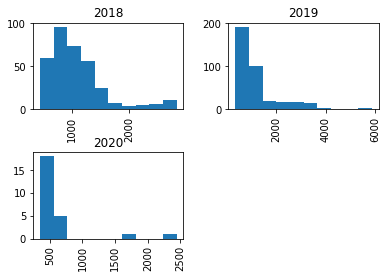

In [35]:
Account_Day_Year = Account_Day
Account_Day_Year['Year'] = Account_Day['YMD'].apply(lambda x: x.year)
Account_Day_Year.hist(by='Year',column = 'count')
plt.show()

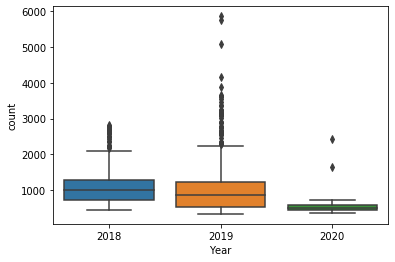

In [34]:
sns.boxplot(x="Year", y="count", data=Account_Day_Year)

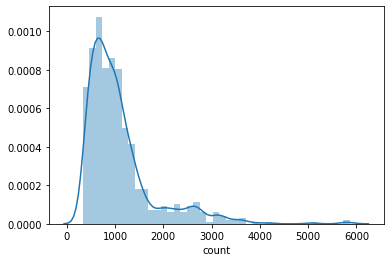

In [36]:
sns.distplot(Account_Day_Year['count'])

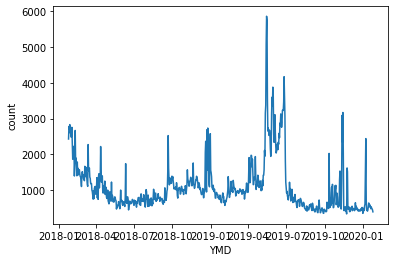

In [37]:
sns.lineplot(x="YMD", y="count", markers=True, dashes=False, data=Account_Day)

In [139]:
Account_Day_Pre = Account_Day.loc[Account_Day['YMD'] >= datetime(2020,1,1), :]
Account_Day_Pos = Account_Day.loc[Account_Day['YMD'] < datetime(2020,1,1), :]

### TimeSeries Decomposition 

#### Stationarity Checking 

In [140]:
from statsmodels.stats.diagnostic import unitroot_adf
TS_Account_Day = Account_Day_Pos.set_index('YMD')
unitroot_adf(TS_Account_Day['count'])

(-3.3058126240223773,
 0.014620640944305666,
 11,
 693,
 {'1%': -3.4398214107097225,
  '5%': -2.8657196436385663,
  '10%': -2.5689957624690525},
 9777.971676194162)

In [141]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    #rolstd = pd.Series(timeseries).rolling(window=12).std()
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

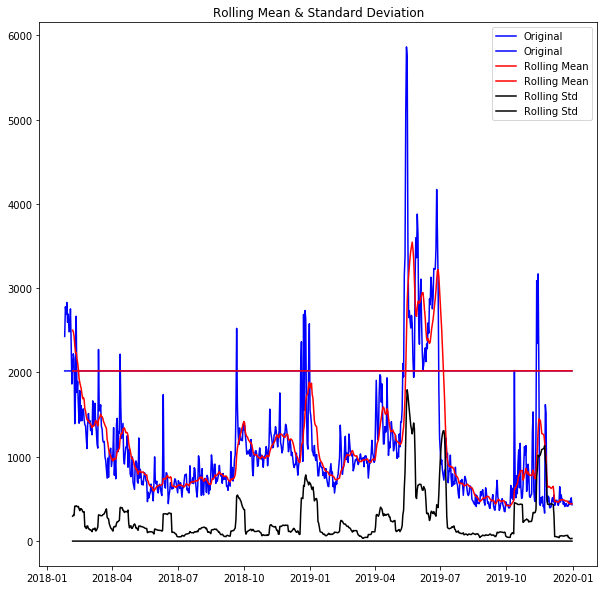

Results of Dickey-Fuller Test:
Test Statistic                  -3.305813
p-value                          0.014621
#Lags Used                      11.000000
Number of Observations Used    693.000000
Critical Value (1%)             -3.439821
Critical Value (5%)             -2.865720
Critical Value (10%)            -2.568996
dtype: float64


In [142]:
test_stationarity(TS_Account_Day)

- Stationary Series

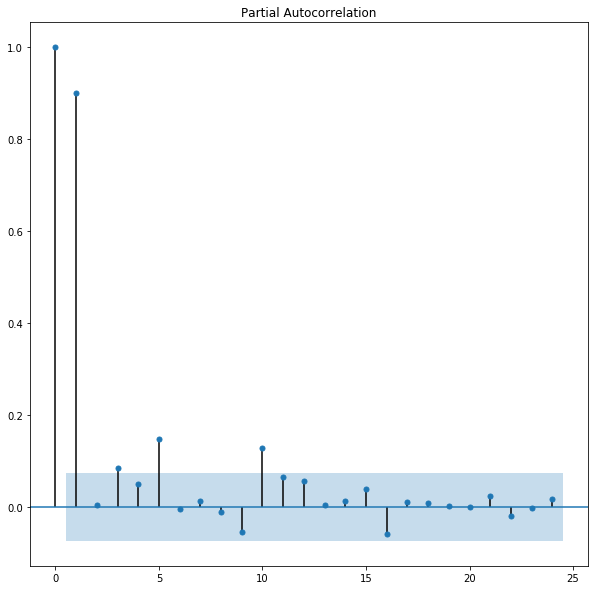

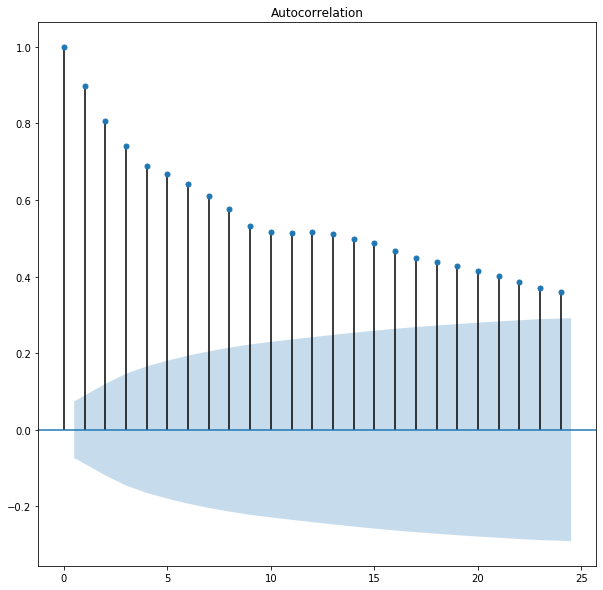

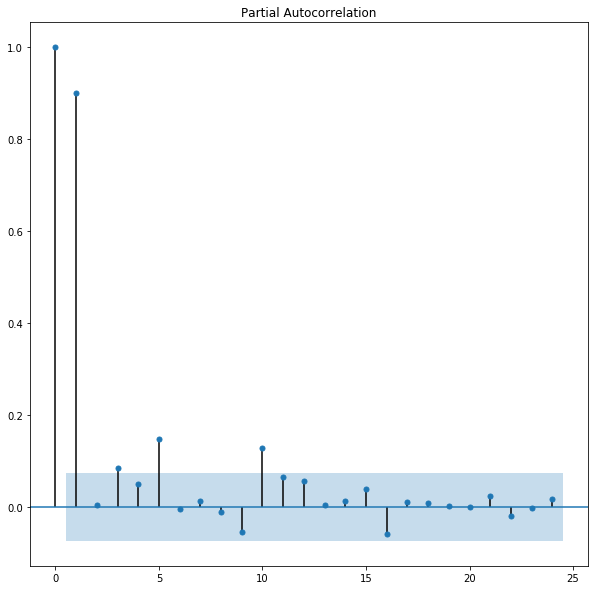

In [143]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(TS_Account_Day['count'],lags=24)
plot_pacf(TS_Account_Day['count'],lags=24)

- High Autocorrelation

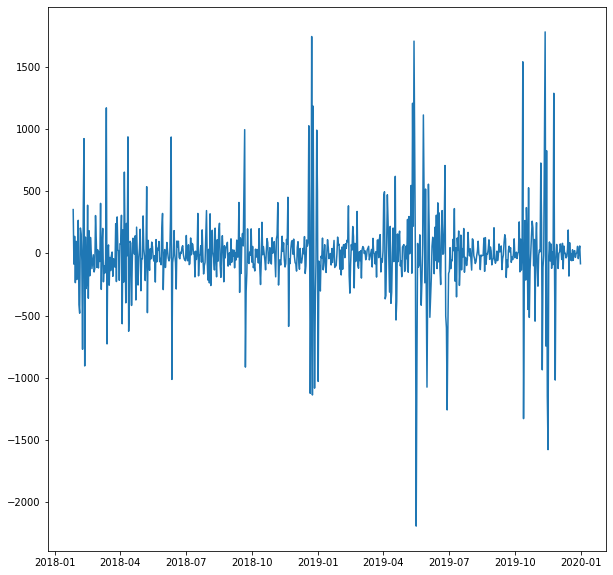

In [144]:
TS_Diff_1 = TS_Account_Day['count'].diff()[1:]
plt.plot(TS_Diff_1)

In [145]:
TS_Diff_1

YMD
2018-01-26    352.0
2018-01-27    -86.0
2018-01-28    137.0
2018-01-29   -235.0
2018-01-30     97.0
              ...  
2019-12-27     57.0
2019-12-28    -42.0
2019-12-29     19.0
2019-12-30     60.0
2019-12-31    -83.0
Name: count, Length: 704, dtype: float64

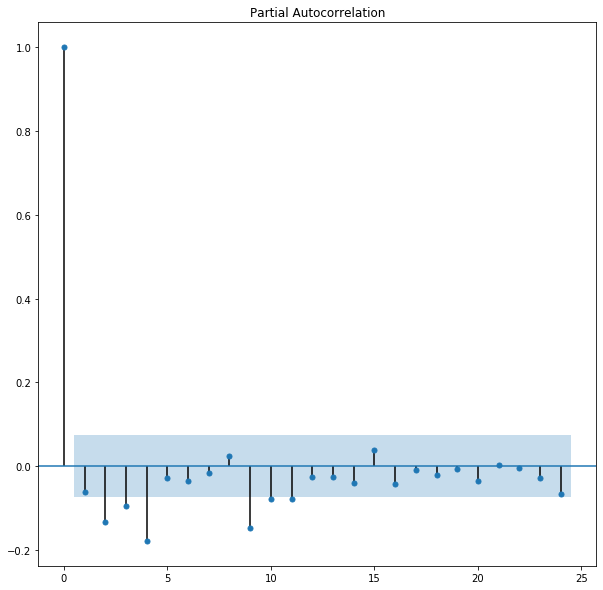

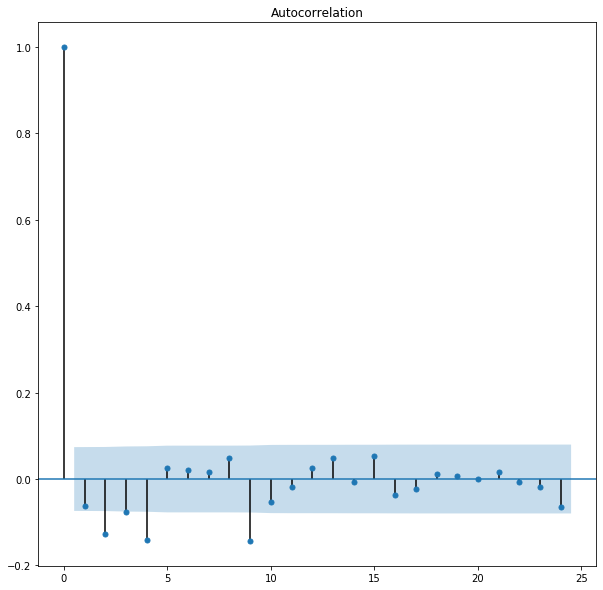

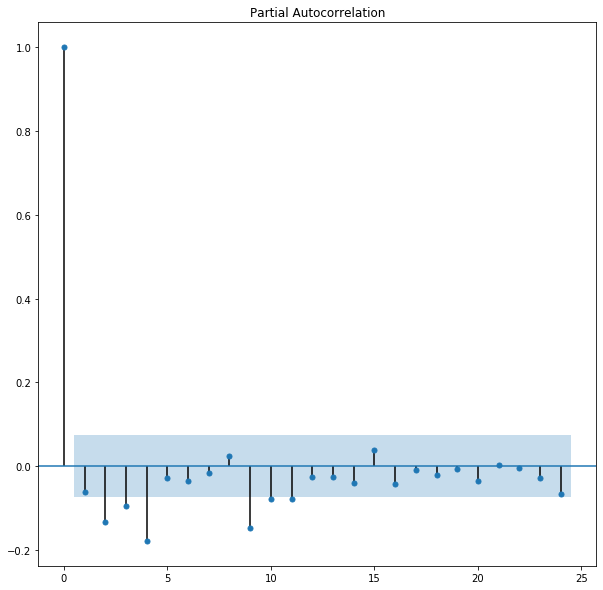

In [146]:
plot_acf(TS_Diff_1,lags=24)
plot_pacf(TS_Diff_1,lags=24)

In [147]:
from statsmodels.stats.diagnostic import acorr_ljungbox
def test_stochastic(ts):
    p_value = acorr_ljungbox(ts)
    return p_value

In [148]:
test_stochastic(TS_Account_Day['count'])
test_stochastic(TS_Diff_1)

(array([ 2.74222957, 14.31517669, 18.36394395, 32.68766475, 33.11608474,
        33.42968016, 33.60660631, 35.34718871, 50.10596711, 52.21029485,
        52.48420365, 52.92614806, 54.6748973 , 54.71134744, 56.79750713,
        57.84328395, 58.21272096, 58.29375393, 58.3362126 , 58.33659988,
        58.5311137 , 58.5559966 , 58.81001423, 61.89440024, 61.92742798,
        63.28956742, 63.29112267, 64.8199396 , 65.86062222, 66.19617138,
        69.85518496, 83.55210053, 83.77202791, 84.71002664, 85.91296967,
        85.92862221, 85.94410531, 85.97675143, 86.15133129, 86.79644   ]),
 array([9.77283265e-02, 7.78930803e-04, 3.70005289e-04, 1.38391321e-06,
        3.56886647e-06, 8.66689190e-06, 2.04033457e-05, 2.31121649e-05,
        1.02892489e-07, 1.04324650e-07, 2.22744298e-07, 4.24586864e-07,
        4.60789233e-07, 9.70418699e-07, 8.88180285e-07, 1.20314530e-06,
        2.06623529e-06, 3.84904582e-06, 7.07220671e-06, 1.28420015e-05,
        2.12536568e-05, 3.64540683e-05, 5.66675087e-05

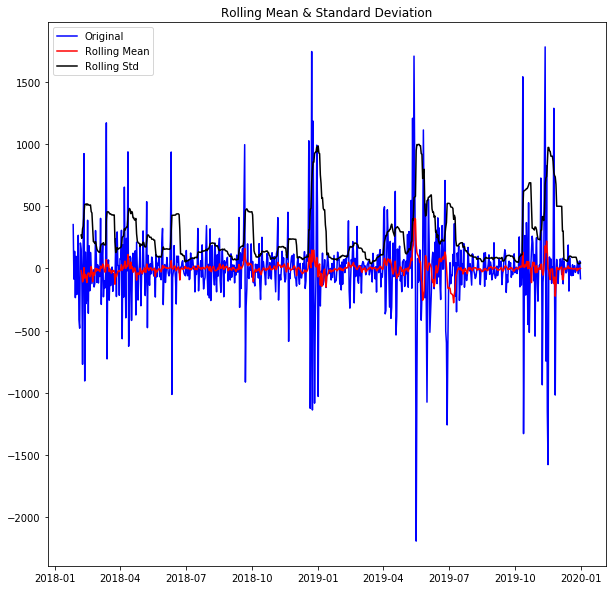

Results of Dickey-Fuller Test:


IndexingError: Too many indexers

In [149]:
test_stationarity(TS_Diff_1)
TS_Diff_1

#### Time Series Decomposition

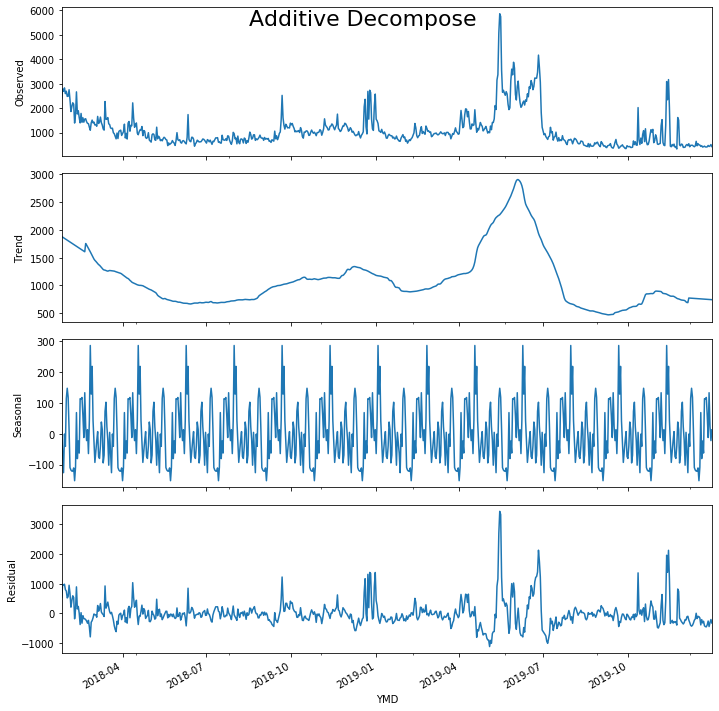

In [150]:
# Multiplicative Decomposition 
# result_mul = seasonal_decompose(TS_Account_Day['count'], model='multiplicative', extrapolate_trend='freq', freq = 52)

# Additive Decomposition
result_add = seasonal_decompose(TS_Account_Day['count'], model='additive', extrapolate_trend='freq', freq = 52)
# result_add = seasonal_decompose(TS_Diff_1, model='additive', extrapolate_trend='freq', freq = 52)

# # Plot
plt.rcParams.update({'figure.figsize': (10,10)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

#### Building up TS mode (ARIMA...)

In [151]:
import statsmodels.tsa.stattools as st
order = st.arma_order_select_ic(TS_Diff_1, max_ar=5,max_ma=5,ic=['aic', 'bic', 'hqic'])
order.bic_min_order

(1, 1)

In [156]:
import itertools
import statsmodels.api as sm
p = q = range(0, 2) 
d = range(1,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(TS_Account_Day['count'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
# 12 - 10137 -- 1, 1, 1, 0, 1, 1, 12
# 7 - 9871 -- 1, 1, 1, 0, 1, 1, 7

C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:10493.632345738439
ARIMA(0, 1, 0)x(0, 1, 1, 7) - AIC:9931.251905720013
ARIMA(0, 1, 0)x(1, 1, 0, 7) - AIC:10215.422792046209


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 1, 0)x(1, 1, 1, 7) - AIC:9932.826291602232
ARIMA(0, 1, 1)x(0, 1, 0, 7) - AIC:10473.066024916036


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 1, 1)x(0, 1, 1, 7) - AIC:9903.140318535956


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 1, 1)x(1, 1, 0, 7) - AIC:10206.866193980992


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 1, 1)x(1, 1, 1, 7) - AIC:9904.892207458382
ARIMA(1, 1, 0)x(0, 1, 0, 7) - AIC:10488.870215462946


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 0)x(0, 1, 1, 7) - AIC:9929.29351601807


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 0)x(1, 1, 0, 7) - AIC:10195.51435459876


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 0)x(1, 1, 1, 7) - AIC:9930.942741183373


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(0, 1, 0, 7) - AIC:10387.111246623695


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(0, 1, 1, 7) - AIC:9871.204844889675


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(1, 1, 0, 7) - AIC:10125.03795874305


C:\Users\Joanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(1, 1, 1, 7) - AIC:9873.18522036988


#### TS Prediction

In [157]:
mod = sm.tsa.statespace.SARIMAX(Account_Day_Pos['count'],order=(1,1,1),seasonal_order=(0, 1, 1, 7),enforce_stationarity=False,enforce_invertibility=False)
result = mod.fit()
predict_sunspots = result.forecast(25)
forcast = np.array(predict_sunspots[:]).reshape(-1)
print(forcast)

[467.29499769 488.27386806 390.51528452 293.60011805 324.8664291
 403.6178649  450.36293371 477.03831774 490.12847152 386.50980197
 285.24150559 313.27412008 389.62342369 434.58408295 459.933929
 472.03941481 367.68929053 265.87763738 293.50662253 369.5560925
 414.29402212 439.4784148  451.46099456 347.01957025 245.14009541]


In [161]:
len(Real)

25

In [163]:
Real = Account_Day_Pre['count'].tolist()
error = (Real - forcast)/Real
MFE = error.mean()
MAE = np.abs(error).mean()
print(f'The error of each model value looks like this: {error}')
print(f'The MFE error was {MFE}, the MAE error was {MAE}')

The error of each model value looks like this: [-0.34280172 -0.11478052  0.20140024  0.30754689  0.40825787  0.33724489
  0.72754813  0.80441233  0.31546303  0.11350963  0.34876369  0.23404861
  0.12835923  0.19372155  0.27910042  0.10258666  0.37039505  0.54316557
  0.45444866  0.22362165  0.2168355   0.10856305  0.04755064  0.22366987
  0.37143565]
The MFE error was 0.2641626632462252, the MAE error was 0.3007692422993495


In [169]:
Account_Day_Pre.loc[:,'Forecast'] = forcast
Account_Day_Pre.rename(columns={"count": "Real"})
del Account_Day_Pre['Forecase']
Account_Day_Pre

,YMD,count,Year,Forecast
705,2020-01-01,348,2020,467.294998
706,2020-01-02,438,2020,488.273868
707,2020-01-03,489,2020,390.515285
708,2020-01-04,424,2020,293.600118
709,2020-01-05,549,2020,324.866429
710,2020-01-06,609,2020,403.617865
711,2020-01-07,1653,2020,450.362934
712,2020-01-08,2439,2020,477.038318
713,2020-01-09,716,2020,490.128472
714,2020-01-10,436,2020,386.509802


In [178]:
Account_Day_Pos.loc[:, 'Forecast'] = None
Result = pd.concat([Account_Day_Pos, Account_Day_Pre])
Result = Result.rename(columns={"count": "Real"})
Result = Result.loc[Result['YMD']>=datetime(2019,6,1)]

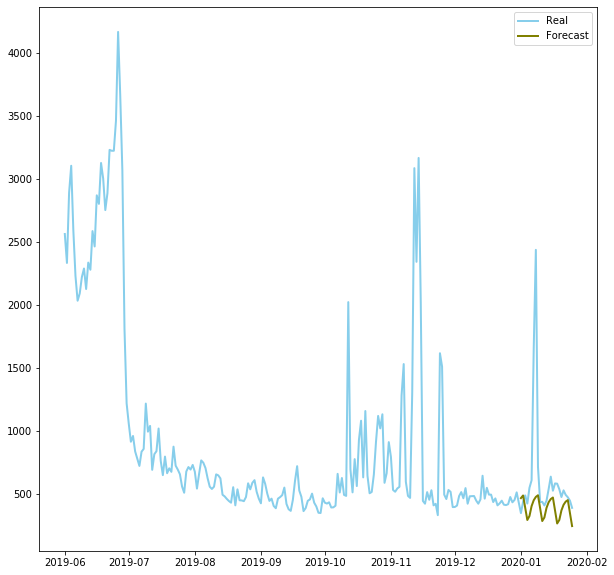

In [179]:
plt.plot( 'YMD', 'Real', data=Result, marker='', color='skyblue', linewidth=2, label="Real")
plt.plot( 'YMD', 'Forecast', data=Result, marker='', color='olive', linewidth=2, label="Forecast")
plt.legend()

# Research on Parent Account

## Strange Parent Account Hash --> Monitor those accounts

## Active Time

## Network Plot